In [1]:
# Import all libraries
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Explore the data shapes
mnist = datasets.load_digits()

# data is the input
X = mnist.data
print(mnist.data.shape)

# target is the output
Y = mnist.target
print(mnist.target.shape)

(1797, 64)
(1797,)


In [3]:
# Print the data

# Print input present at index 0
print(mnist.data[0])

# Print output present at index 0
print(mnist.target[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0


In [4]:
# Preprocess the data

# Convert output to 1D array of type category with int datatype
y = pd.Series(mnist.target).astype('int').astype('category')

# Convert input to a tabular set of values
X = pd.DataFrame(mnist.data)

# head() is to print the top 5 values
print(X.head())
print(y.head())

    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]
0    0
1    1
2    2
3    3
4    4
dtype: category
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]


In [5]:
# Fetch training and testing data
# 30% is testing data and 70% is training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
# fit = train and predict = test
# Print the accuracy

# Number of trees = 10 
clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Number of trees = 50
clf=RandomForestClassifier(n_estimators=50)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Number of trees = 100
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9388888888888889
Accuracy:  0.9722222222222222
Accuracy:  0.9777777777777777


In [7]:
# Estimate the feature importance
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)

# Print the top 5 significant features
feature_imp[:5]

21    0.056473
28    0.042625
26    0.042154
43    0.040570
36    0.037773
dtype: float64

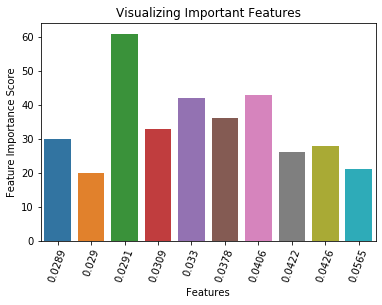

In [21]:
# Visualize the feature importance
%matplotlib inline

sns.barplot(x=round(feature_imp[:10], 4), y=feature_imp[:10].index)

plt.ylabel('Feature Importance Score')
# plt.xticks([])
plt.xticks(rotation=70)
plt.xlabel('Features')
plt.title("Visualizing Important Features")
plt.show()